In [1]:
from pandas_datareader import data

In [2]:
t = data.DataReader("T", 
                       start='2000-1-1', 
                       end='2020-12-31', 
                       data_source='yahoo')

In [4]:
t = t.reset_index()

In [6]:
t['Year'] = t['Date'].dt.year
t['month'] = t['Date'].dt.month
t['day'] = t['Date'].dt.day

In [7]:
def quarter(row):
    if row['month'] == 1 or row['month'] == 2 or row['month'] == 3:
        return 1
    elif row['month'] == 4 or row['month'] == 5 or row['month'] == 6:
        return 4
    elif row['month'] == 7 or row['month'] == 8 or row['month'] == 9:
        return 7
    else:
        return 10

t['quarter'] = t.apply(quarter, axis =1)

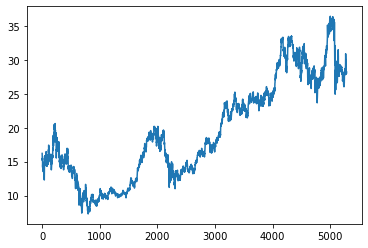

In [8]:
import matplotlib.pyplot as plt
plt.plot(t['Adj Close'])
plt.show()

In [9]:
import pandas as pd

data = pd.read_csv('data_usa.csv', index_col=0)

data_t = data[data['year'] >= 2000 ]
data_t

,DATE,GDP,growth_rate,year,month,jobs,growth_jobs
212,2000-01-01,10002.857,1.045308,2000,1,131005,0.636057
213,2000-04-01,10247.679,2.447521,2000,4,131888,0.674020
214,2000-07-01,10319.825,0.704023,2000,7,132236,0.263860
215,2000-10-01,10439.025,1.155058,2000,10,132351,0.086966
216,2001-01-01,10472.879,0.324302,2001,1,132698,0.262182
...,...,...,...,...,...,...,...
291,2019-10-01,21729.124,0.866119,2019,10,151524,0.404869
292,2020-01-01,21539.689,-0.871802,2020,1,152234,0.468573
293,2020-04-01,19520.114,-9.376064,2020,4,130161,-14.499389
294,2020-07-01,21170.252,8.453526,2020,7,139566,7.225667


In [10]:
t_final = pd.merge(left = data_t.reset_index(drop=True), right = t, left_on = 'month', right_on = 'quarter', how= 'left')

In [11]:
t_final = t_final[['Date','GDP','growth_rate','jobs','growth_jobs','High','Low','Open','Close','Volume','Adj Close','quarter','Year','month_y','day']].set_index('Date')

t_final

,GDP,growth_rate,jobs,growth_jobs,High,Low,Open,Close,Volume,Adj Close,quarter,Year,month_y,day
Date,,,,,,,,,,,,,,
2000-01-03,10002.857,1.045308,131005,0.636057,49.000000,46.625000,48.562500,47.000000,5791900.0,16.213778,1,2000,1,3
2000-01-04,10002.857,1.045308,131005,0.636057,47.750000,43.500000,47.062500,44.250000,7173600.0,15.265100,1,2000,1,4
2000-01-05,10002.857,1.045308,131005,0.636057,45.250000,44.437500,45.000000,44.937500,9090000.0,15.502277,1,2000,1,5
2000-01-06,10002.857,1.045308,131005,0.636057,45.000000,43.125000,44.562500,43.750000,7153600.0,15.175017,1,2000,1,6
2000-01-07,10002.857,1.045308,131005,0.636057,44.750000,43.375000,44.562500,44.125000,5885600.0,15.305085,1,2000,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,21487.896,1.500426,142545,2.134474,28.760000,28.500000,28.730000,28.690001,19153100.0,28.191212,10,2020,12,24
2020-12-28,21487.896,1.500426,142545,2.134474,28.959999,28.500000,28.930000,28.549999,41619500.0,28.053644,10,2020,12,28
2020-12-29,21487.896,1.500426,142545,2.134474,28.879999,28.510000,28.690001,28.540001,36617500.0,28.043819,10,2020,12,29


In [12]:
X = t_final.drop(['GDP','jobs','Close','Volume'], axis = 1)
y = t_final['Close']

X_train = X[:105416]
y_train = y[1:105417]

X_test = X[105416:len(X)-1]
y_test = y[105417:]

In [13]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
display(xgb_reg.score(X_test,y_test))
display(xgb_reg.score(X_train,y_train))

[10:56:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9832343441017655

0.983590566888192

In [14]:
pred = xgb_reg.predict(X_test)

In [15]:
from sklearn.metrics import r2_score


r2_score(y_test, pred)

0.9832343441017655

In [15]:
from sklearn.model_selection import cross_validate

results = cross_validate(xgb_reg,X_train, y_train, cv = 10)


[16:47:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [16]:
results['test_score'].mean()
results['test_score']

array([0.99760755, 0.99736837, 0.99763884, 0.99748885, 0.99746727,
       0.99754035, 0.99755364, 0.99778709, 0.99765013, 0.99787662])

In [16]:
import pickle

pickle.dump(xgb_reg, open('model_t.p', 'wb'))